# Extracting and Analyzing ITUB4.SA Data

This guide demonstrates how to use the `DataHandler` to extract data for Itaú (ITUB4.SA) and perform a simple moving average analysis to identify potential buy/sell signals.

## Step 1: Import Required Modules

In [1]:
# Import the handler and other necessary libraries
from algo_trading.data_handler import DataHandler
import matplotlib.pyplot as plt
import pandas as pd

## Step 2: Initialize the DataHandler with yfinance


In [2]:
# Initialize the DataHandler using the 'yfinance' source
handler = DataHandler(source="yfinance")

## Step 3: Fetch Data for Itaú (ITUB4.SA)


In [4]:
# Fetch data for Itaú (ticker: ITUB4.SA) for the last 6 months
symbol = "ITUB4.SA"
data = handler.fetch_data(symbol=symbol, period="6mo", interval="1d")
data.head()  # Display the first few rows

Failed to get ticker 'ITUB4.SA' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


c:\Users\pedro\Anaconda3\envs\backtestenv\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,31.990000,32.860001,31.980000,32.340000,31.697605,32487800
2024-06-25,32.330002,32.680000,32.240002,32.439999,31.795612,23973600
2024-06-26,32.230000,32.380001,31.809999,32.380001,31.736813,23633300
2024-06-27,32.450001,32.610001,32.279999,32.439999,31.795612,15015600
2024-06-28,32.480000,32.540001,32.049999,32.410000,31.766214,28992100


## Step 4: Analyze the Data

### Calculate Moving Averages

In [5]:
# Calculate 20-day and 50-day moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()

### Identify Crossovers


In [6]:
# Add a signal column to identify crossover points
data['Signal'] = 0
data.loc[data['20_MA'] > data['50_MA'], 'Signal'] = 1  # Buy signal
data.loc[data['20_MA'] < data['50_MA'], 'Signal'] = -1  # Sell signal

## Step 5: Visualize the Data


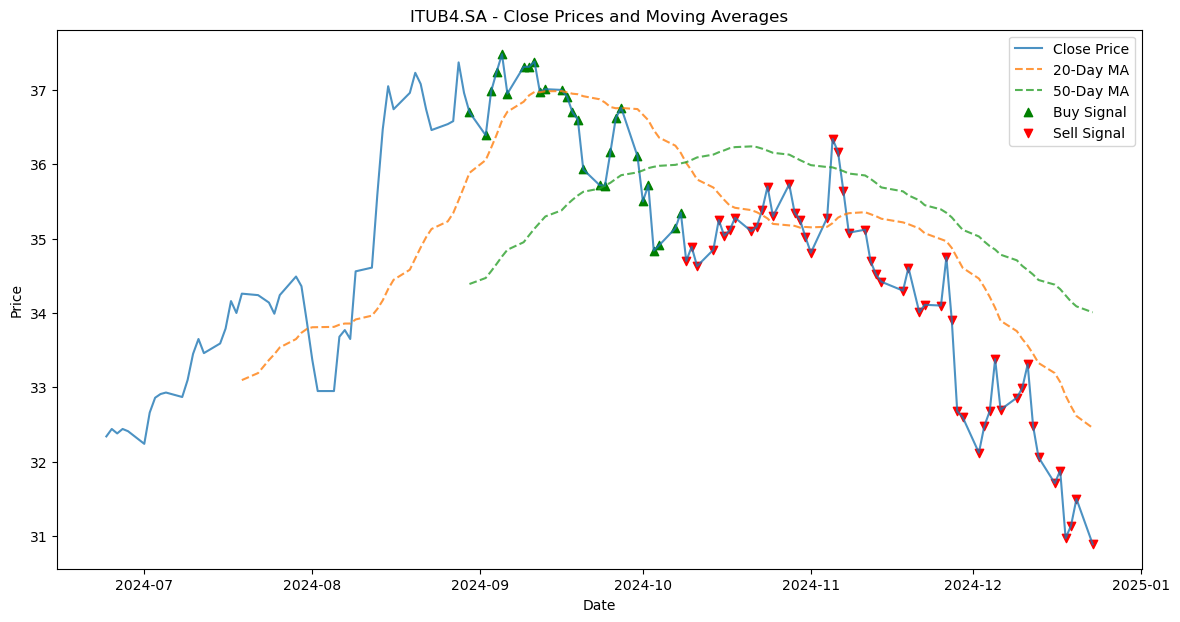

In [7]:
# Plot the close prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.8)
plt.plot(data['20_MA'], label='20-Day MA', linestyle='--', alpha=0.8)
plt.plot(data['50_MA'], label='50-Day MA', linestyle='--', alpha=0.8)

# Highlight buy and sell signals
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title(f"ITUB4.SA - Close Prices and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Summary
This script extracts data for Itaú (ITUB4.SA) using the `DataHandler` and performs:
1. Calculation of 20-day and 50-day moving averages.
2. Identification of buy/sell signals based on moving average crossovers.
3. Visualization of the close prices, moving averages, and signals.

This provides a foundation for further financial analysis or trading strategy development.
